# MNIST Classification using CNN

https://www.kaggle.com/code/merfarukyce/mnist-cnn-classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}\n")

print(f"Unique values in y_train: {np.unique(y_train)}")
print(f"Unique values in y_test: {np.unique(y_test)}\n")


x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)

Unique values in y_train: [0 1 2 3 4 5 6 7 8 9]
Unique values in y_test: [0 1 2 3 4 5 6 7 8 9]



C:\Users\Shlok Sonkusare\AppData\Local\Temp\ipykernel_10800\1859263103.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


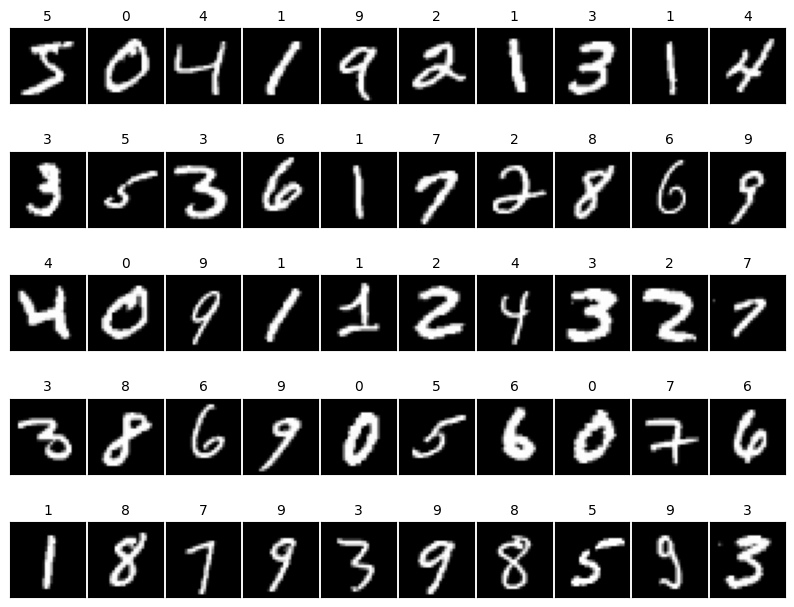

In [4]:
def visualize_images(data):
    fig, axes = plt.subplots(nrows=5, ncols=10, figsize=(10,8),
                             gridspec_kw={'wspace':0.04, 'hspace':0.01}, 
                             squeeze=True)
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(x_train[i], cmap='gray')
        ax.set_xticks([]), ax.set_yticks([])
        ax.set_title(str(y_train[i]), fontsize=10)
        
    plt.tight_layout()
    plt.show()

visualize_images(x_train)

In [5]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [7]:

x_train = x_train.reshape(-1, 28, 28, 1) 
x_test = x_test.reshape(-1, 28, 28, 1)  


print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [8]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"])


In [9]:
datagen = ImageDataGenerator(rescale=1./255) 
history = model.fit(datagen.flow(x_train, y_train, batch_size=100), epochs=20, 
                    validation_data=(x_test, y_test))

Epoch 1/20
600/600 [==============================] - 36s 59ms/step - loss: 0.6239 - precision: 0.9467 - recall: 0.7347 - accuracy: 0.7799 - val_loss: 13.2515 - val_precision: 0.9651 - val_recall: 0.9651 - val_accuracy: 0.9651
Epoch 2/20
600/600 [==============================] - 35s 59ms/step - loss: 0.0804 - precision: 0.9788 - recall: 0.9730 - accuracy: 0.9756 - val_loss: 6.8421 - val_precision: 0.9817 - val_recall: 0.9817 - val_accuracy: 0.9817
Epoch 3/20
600/600 [==============================] - 37s 62ms/step - loss: 0.0533 - precision: 0.9851 - recall: 0.9818 - accuracy: 0.9832 - val_loss: 5.0149 - val_precision: 0.9839 - val_recall: 0.9839 - val_accuracy: 0.9839
Epoch 4/20
600/600 [==============================] - 37s 62ms/step - loss: 0.0409 - precision: 0.9885 - recall: 0.9862 - accuracy: 0.9872 - val_loss: 5.8785 - val_precision: 0.9851 - val_recall: 0.9851 - val_accuracy: 0.9851
Epoch 5/20
600/600 [==============================] - 38s 64ms/step - loss: 0.0325 - precision:

KeyboardInterrupt: 

In [ ]:
y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
loss, precision, recall, acc=model.evaluate(x_test, y_test, verbose=False)
print('Test Accuracy: ', acc)
print('Test Loss: ', loss)
print('Test Precision: ', precision)
print('Test Recall: ', recall)

Test Accuracy:  0.992900013923645
Test Loss:  0.02282491698861122
Test Precision:  0.9930979013442993
Test Recall:  0.9927999973297119


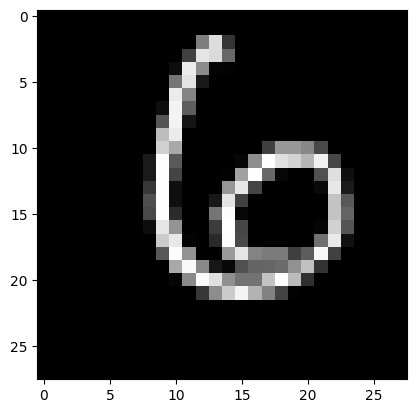

In [ ]:
value = 100

test_image = x_test[value]
y_test[value]

plt.imshow(test_image.reshape(28,28), cmap='gray')

In [ ]:
test_data = x_test[value].reshape(1,28,28,1)
probability = model.predict(test_data)
probability

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[2.8439786e-07, 1.8871464e-17, 1.2794078e-10, 1.8908332e-12,
        1.8151954e-11, 6.2460941e-08, 9.9999964e-01, 1.1534402e-16,
        4.1498222e-10, 3.6669581e-10]], dtype=float32)

In [ ]:
predicted_classes = np.argmax(probability)
predicted_classes

np.int64(6)

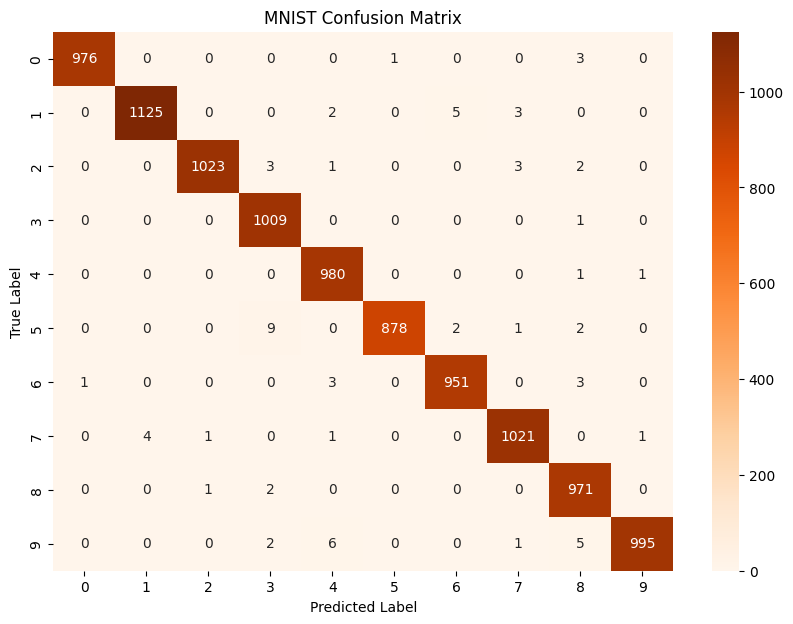

In [ ]:
y_pred_labels = y_pred_class
y_test_labels = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("MNIST Confusion Matrix")
plt.show()

In [ ]:
class_labels = ['0','1','2','3','4','5','6','7','8','9']
report = classification_report(y_true, y_pred_class, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      0.99      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       1.00      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      1.00      0.99       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

